In [0]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd '/content/drive/My Drive/CSCE_689'

/content/drive/.shortcut-targets-by-id/188Eba_cLfN68Gy_4d0czpAJtiCmTs8jW/CSCE_689


In [0]:
!ls 

 0.avi	   55.avi    all_label.csv
 100.avi   56.avi    best_model
 10.avi    57.avi    clf_NB.sav
 11.avi    58.avi    combinedlabels_2.csv
 12.avi    59.avi    combinedlabels2.csv
 13.avi    5.avi     Data2.npy
 14.avi    60.avi    Data3.npy
 15.avi    61.avi    Data.npy
 16.avi    62.avi    Drowsiness-Detection-using-Deep-Learning
 17.avi    63.avi    Features_final_2.csv
 18.avi    64.avi    Features_final2.csv
 19.avi    65.avi    Features_final.csv
 1.avi	   66.avi   'First submission'
 20.avi    67.avi    KNN.sav
 21.avi    68.avi    Labels_final.csv
 22.avi    69.avi    LR.sav
 23.avi    6.avi     MLP.sav
 24.avi    70.avi    model1.h5
 25.avi    71.avi    model.h5
 26.avi    72.avi    model.json
 27.avi    73.avi    model.png
 28.avi    74.avi    NN_test.npy
 29.avi    75.avi    NN_train.npy
 2.avi	   76.avi    optimization
 30.avi    77.avi    Prediction
 31.avi    78.avi    Prediction_train
 32.avi    80.avi   'Pred_label (1).npy'
 34.avi    81.avi    Pred_label.npy
 35.avi  

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
import joblib

In [0]:
X_train=np.load("x_train.npy")
y_train=np.load("y_train.npy")
X_test=np.load("x_test.npy")
y_test=np.load("y_test.npy")
X=np.append(X_train,X_test,axis=0)
Y=np.append(y_train,y_test,axis=0)

In [0]:
def average(y_pred):
  for i in range(len(y_pred)):
    if i % 240 == 0 or (i+1) % 240 == 0:
      pass
    else: 
      average = float(y_pred[i-1] +  y_pred[i] + y_pred[i+1])/3
      if average >= 0.5:
        y_pred[i] = 1
      else:
        y_pred[i] = 0
  return y_pred

## 1. Logistic Regression

In [0]:
clf = LogisticRegression(max_iter=500).fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)
# y_pred_1 = average(y_pred_1)
y_score_1 = clf.predict_proba(X_test)[:,1]
y_LR=clf.predict_proba(X_train)[:,1]
acc1 = accuracy_score(y_test, y_pred_1)
f1_score_1 = metrics.f1_score(y_test, y_pred_1)
roc_1 = metrics.roc_auc_score(y_test, y_score_1)
print([acc1,f1_score_1,roc_1])
print(confusion_matrix(y_test, y_pred_1))
# save the model to disk
joblib.dump(clf, 'LR.sav')

[0.7655986509274874, 0.06711409395973154, 0.5175481158013909]
[[449   9]
 [130   5]]


['LR.sav']

## 2. Naive Bayes

In [0]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
pred_NB = clf_NB.predict(X_test)
# pred_NB = average(pred_NB)
y_score_2 = clf_NB.predict_proba(X_test)[:,1]
y_NB=clf_NB.predict_proba(X_train)[:,1]
acc2 = accuracy_score(y_test, pred_NB)
f1_score_2 = metrics.f1_score(y_test, pred_NB)
roc_2 = metrics.roc_auc_score(y_test, y_score_2)
print([acc2,f1_score_2,roc_2])
print(confusion_matrix(y_test, pred_NB))
# save the model to disk
joblib.dump(clf_NB, 'clf_NB.sav')

[0.7419898819561551, 0.38056680161943324, 0.635872553776484]
[[393  65]
 [ 88  47]]


['clf_NB.sav']

## 3. KNN

In [0]:
acc3_list = []
f1_score3_list = []
roc_3_list = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    pred_KN = neigh.predict(X_test)
    # pred_KN = average(pred_KN)
    y_score_3 = neigh.predict_proba(X_test)[:,1]
    acc3_list.append(accuracy_score(y_test, pred_KN))
    f1_score3_list.append(metrics.f1_score(y_test, pred_KN))
    roc_3_list.append(metrics.roc_auc_score(y_test, y_score_3))


In [0]:

acc3_list.index(max(acc3_list))+1

26

In [0]:
neigh = KNeighborsClassifier(n_neighbors=acc3_list.index(max(acc3_list))+1)
neigh.fit(X_train, y_train) 
pred_KN = neigh.predict(X_test)
# pred_KN = average(pred_KN)
y_score_3 = neigh.predict_proba(X_test)[:,1]
y_KNN=neigh.predict_proba(X_train)[:,1]
acc3 = accuracy_score(y_test, pred_KN)
f1_score_3 = metrics.f1_score(y_test, pred_KN)
roc_3 = metrics.roc_auc_score(y_test, y_score_3)
print([acc3,f1_score_3,roc_3])
print(confusion_matrix(y_test, pred_KN))
# save the model to disk
joblib.dump(neigh, 'KNN.sav')

[0.7824620573355818, 0.19875776397515532, 0.6513747371825974]
[[448  10]
 [119  16]]


['KNN.sav']

## 4. MLP

In [0]:
from sklearn.neural_network import MLPClassifier
F1_score_4_list = []
acc4_list = []
roc_4_list = []
mlp = []

hidden_units = [10,20,30,40,50,60,70]
optimizer ='lbfgs'
activation = ['logistic','tanh','relu']
for j in activation:
    for k in hidden_units:
      clf_MLP = MLPClassifier(hidden_layer_sizes= k, activation =  j, solver=optimizer,max_iter=2000)
      clf_MLP.fit(X_train, y_train)
      pred_MLP = clf_MLP.predict(X_test)
      # pred_MLP = average(pred_MLP)
      y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
      acc4_list.append(accuracy_score(y_test,pred_MLP))
      roc_4_list.append(metrics.roc_auc_score(y_test, y_score_4))
      F1_score_4_list.append(metrics.f1_score(y_test, pred_MLP))
      mlp.append([j,k])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [0]:
print("Best Accuracy: ", max(acc4_list))
min_index = acc4_list.index(max(acc4_list))
print("Best Combination:", mlp[min_index])

Best Accuracy:  0.8010118043844857
Best Combination: ['relu', 20]


In [0]:
clf_MLP = MLPClassifier(hidden_layer_sizes= mlp[min_index][1], activation =  mlp[min_index][0], solver= optimizer)
clf_MLP.fit(X_train, y_train)
pred_MLP = clf_MLP.predict(X_test)
# pred_MLP = average(pred_MLP)
y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
y_MLP=clf_MLP.predict_proba(X_train)[:,1]
acc4 = accuracy_score(y_test,pred_MLP)
f1_score_4 = metrics.f1_score(y_test, pred_MLP)
roc_4 = metrics.roc_auc_score(y_test, y_score_4)
print([acc4,f1_score_4,roc_4])
print(confusion_matrix(y_test, pred_MLP))
# save the model to disk
joblib.dump(clf_MLP, 'MLP.sav')

[0.7925801011804384, 0.38805970149253727, 0.6882904738799935]
[[431  27]
 [ 96  39]]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


['MLP.sav']

## 5. SVM

In [0]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the parameters by cross-validation
clf_SVM=svm.SVC(kernel='rbf',probability=True)
clf_SVM.fit(X_train, y_train)
y_true,pred_SVM=y_test,clf_SVM.predict(X_test)
y_score_5 = clf_SVM.predict_proba(X_test)[:,1]
y_SVM=clf_SVM.predict_proba(X_train)[:,1]
acc5 = accuracy_score(y_test,pred_SVM)
f1_score_5 = metrics.f1_score(y_test, pred_SVM)
roc_5 = metrics.roc_auc_score(y_test, y_score_5)
print([acc5,f1_score_5,roc_5])
print(confusion_matrix(y_test, pred_SVM))
# save the model to disk
joblib.dump(clf_SVM, 'SVM.sav')

[0.7841483979763912, 0.15789473684210528, 0.715898431182274]
[[453   5]
 [123  12]]


['SVM.sav']

## 6. Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
acc6=[]
max_depth = []
for i in range(1,10):
    clf_RF = RandomForestClassifier(max_depth=i)
    clf_RF.fit(X_train, y_train) 
    pred_RF = clf_RF.predict(X_test)
    # pred_RF = average(pred_RF)
    acc6.append(accuracy_score(pred_RF, y_test))
    max_depth.append(i)
print (max(acc6))

0.7976391231028668


In [0]:
best_depth_6 = max_depth[acc6.index(max(acc6))]

In [0]:
best_depth_6

9

In [0]:
clf_RF = RandomForestClassifier(max_depth=best_depth_6)
clf_RF.fit(X_train, y_train) 
pred_RF = clf_RF.predict(X_test)
# pred_RF = average(pred_RF)
y_score_6 = clf_RF.predict_proba(X_test)[:,1]
y_RF=clf_RF.predict_proba(X_train)[:,1]
acc6 = accuracy_score(y_test, pred_RF)
f1_score_6 = metrics.f1_score(y_test, pred_RF)
roc_6 = metrics.roc_auc_score(y_test, y_score_6)
print([acc6,f1_score_6,roc_6])
print(confusion_matrix(y_test, pred_RF))
# save the model to disk
joblib.dump(clf_RF, 'RF.sav')
# feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                  #  index = X_train.columns,
                                    # columns=['importance']).sort_values('importance',ascending=False)

[0.7959527824620574, 0.3085714285714286, 0.6958677017628981]
[[445  13]
 [108  27]]


['RF.sav']

## 7. AdaBoost

In [0]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", max_depth = None)

clf_ADB = AdaBoostClassifier(base_estimator = DTC)

# run grid search
clf_ABC = GridSearchCV(clf_ADB, param_grid=param_grid, scoring = 'f1')
clf_ABC.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf_ABC.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf_ABC.cv_results_['mean_test_score']
stds = clf_ABC.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_ABC.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, pred_ABC = y_test, clf_ABC.predict(X_test)
# print(classification_report(y_true, pred_ABC))
print()
y_score_7 = clf_ABC.predict_proba(X_test)[:,1]
y_ABC=clf_ABC.predict_proba(X_train)[:,1]
acc7 = accuracy_score(y_test,pred_ABC)
f1_score_7 = metrics.f1_score(y_test, pred_ABC)
roc_7 = metrics.roc_auc_score(y_test, y_score_7)
print([acc7,f1_score_7,roc_7])
print(confusion_matrix(y_test, pred_ABC))
# save the model to disk
joblib.dump(clf_ABC, 'ABC.sav')

Best parameters set found on development set:

{'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 1}

Grid scores on development set:

0.335 (+/-0.133) for {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 1}
0.291 (+/-0.196) for {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 2}
0.324 (+/-0.111) for {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'n_estimators': 1}
0.260 (+/-0.166) for {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'n_estimators': 2}
0.341 (+/-0.119) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 1}
0.275 (+/-0.181) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 2}
0.324 (+/-0.140) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'n_estimators': 1}
0.281 (+/-

['ABC.sav']

## 8. XGBoost

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
  }
]

scoring = 'f1'
clf_XGB= GridSearchCV(
  XGBClassifier(objective='binary:logistic'),
  param_grid=search_space,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)
clf_XGB.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf_XGB.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf_XGB.cv_results_['mean_test_score']
stds = clf_XGB.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_XGB.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, pred_XGB = y_test, clf_XGB.predict(X_test)
# print(classification_report(y_true, pred_XGB))
print()

y_score_8 = clf_XGB.predict_proba(X_test)[:,1]
y_XGB=clf_XGB.predict_proba(X_train)[:,1]
acc8 = accuracy_score(y_test,pred_XGB)
f1_score_8 = metrics.f1_score(y_test, pred_XGB)
roc_8 = metrics.roc_auc_score(y_test, y_score_8)
print([acc8,f1_score_8,roc_8])
print(confusion_matrix(y_test, pred_XGB))
# save the model to disk
joblib.dump(clf_XGB, 'XGB.sav')

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed: 11.5min finished


Best parameters set found on development set:

{'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 50}

Grid scores on development set:

0.241 (+/-0.212) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 50}
0.241 (+/-0.212) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 100}
0.241 (+/-0.212) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 150}
0.241 (+/-0.212) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 200}
0.241 (+/-0.212) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 4, 'clf__n_estimators': 50}
0.241 (+/-0.212) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0

['XGB.sav']

# Blend Function

In [0]:
TF_label=pd.read_csv("all_label.csv")

In [0]:
# pull model prediction
y_NN= np.load("NN_train.npy")
df=pd.DataFrame()
df['LR']=y_LR
df['NB']=y_NB
df['KNN']=y_KNN
df['MLP']=y_MLP
df['SVM']=y_SVM
df['RF']=y_RF
df['ABC']=y_ABC
df['XGB']=y_XGB
df['NN']=y_NN

In [0]:
df_test=pd.DataFrame()
df_test['LR']=y_score_1
df_test['NB']=y_score_2
df_test['KNN']=y_score_3
df_test['MLP']=y_score_4
df_test['SVM']=y_score_5
df_test['RF']=y_score_6
df_test['ABC']=y_score_7
df_test['XGB']=y_score_8
df_test['NN']=np.load("NN_test.npy")

In [0]:
y_train.shape

(5559,)

In [0]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

blend = Sequential()
blend.add(Dense(16, input_dim=9, activation='tanh'))
blend.add(Dense(8, activation='relu'))
blend.add(Dense(2, activation='softmax'))
blend.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history=blend.fit(df.values, y_train, epochs=150,validation_data=(df_test.values,y_test), verbose=1)
blend.summary()

Epoch 1/150
174/174 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5105 - val_loss: 0.6940 - val_accuracy: 0.3676
Epoch 2/150
174/174 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4891 - val_loss: 0.6935 - val_accuracy: 0.3305
Epoch 3/150
174/174 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4825 - val_loss: 0.6933 - val_accuracy: 0.3356
Epoch 4/150
174/174 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4794 - val_loss: 0.6932 - val_accuracy: 0.4418
Epoch 5/150
174/174 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4657 - val_loss: 0.6932 - val_accuracy: 0.3457
Epoch 6/150
174/174 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4702 - val_loss: 0.6932 - val_accuracy: 0.3609
Epoch 7/150
174/174 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4585 - val_loss: 0.6932 - val_accuracy: 0.3103

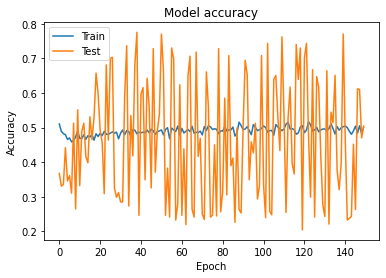

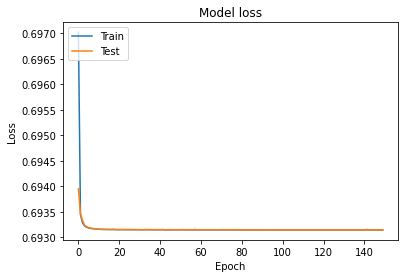

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = blend.predict_classes(df_test.values)
y_BM=blend.predict_proba(df_test.values)[:,1]
acc1 = accuracy_score(y_test, y_pred)
f1_score_1 = metrics.f1_score(y_test, y_pred)
roc_1 = metrics.roc_auc_score(y_test, y_BM)
print([acc1,f1_score_1,roc_1])
print(confusion_matrix(y_test, y_pred))
blend.save('blend.h5')

[0.5042158516020236, 0.3466666666666667, 0.564450913795892]
[[221 237]
 [ 57  78]]
